## Customer Segmentation using RFM Analysis

### **Objective:**
Your objective is to perform RFM analysis on the dataset and segment the customers
into distinct groups based on their RFM scores. These segments will provide valuable insights for
marketing and customer retention strategies.

In [ ]:
import pandas as pd

### 1. Data Preprocessing:

In [ ]:
# Loading the dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Inspecting the dataset
startx_datax_infox = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


NOTE : THE TOTAL NUMBER OF ENTRIES IN THE DATASET ARE 541909 ACROSS THE 8 COLUMNS

In [ ]:
# Checking for missing values in the dataset
numx_of_missvalx = data.isnull().sum()
numx_of_missvalx

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

NOTE : WE CAN SEE MISSING VALUES ARE PRESENT IN THE "Description" AND THE "CustomerID", AND WE NEED TO HANDLE THEM.

In [ ]:
# Handling "Description" and "CustomerID"
cleanx_customerx_datax = data.dropna(subset=['Description', 'CustomerID'])
cleanx_customerx_datax

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Converting 'CustomerID' from float to integer
cleanx_customerx_datax['CustomerID'] = cleanx_customerx_datax['CustomerID'].astype(int)
# Converting InvoiceDate to datetime format
cleanx_customerx_datax['InvoiceDate'] = pd.to_datetime(cleanx_customerx_datax['InvoiceDate'])


C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\3957621601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanx_customerx_datax['CustomerID'] = cleanx_customerx_datax['CustomerID'].astype(int)
C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\3957621601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanx_customerx_datax['InvoiceDate'] = pd.to_datetime(cleanx_customerx_datax['InvoiceDate'])


In [ ]:
# Checking if the data has been handled successfully
finalx_misvalx_infox = cleanx_customerx_datax
finalx_misvalx_infox.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Checking if the CustomerID and InvoiceDate has been converted to the appropriate data type
finalx_misvalx_infox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


NOTE : Above we can see that the CustomerId has been converted to the interger annd the InvoiceDate to the datetime format.

# NOTE - FOR CLEANING AND HANDLING THE DATA :
1. InvoiceDate was converted to a datetime format for more efficient date handling.
2. Rows with missing Description and CustomerID were removed, as this information is essential for item identification.
3. CustomerID was converted to an integer data type for consistency and ease of analysis.

In [ ]:
# Renaming variable
data= finalx_misvalx_infox

### 2. RFM Calculation:

In [ ]:
# Converting 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Assuming 'today' is the day after the latest date in the dataset
latest_date = data['InvoiceDate'].max()
today = latest_date + pd.Timedelta(days=1)

# RFM Calculation
# Recency: Days since last purchase
recency = data.groupby('CustomerID')['InvoiceDate'].max()
recency = today - recency
recency = recency.dt.days
# Frequency: Total number of orders for each customer
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
# Calculating TotalPrice for Monetary
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
# Monetary: Sum of total price for each customer
monetary = data.groupby('CustomerID')['TotalPrice'].sum()

# Creating the RFM DataFrame
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Displaying the first 5 rows of the RFM DataFrame
rfm.head()

C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\229836316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\229836316.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


**Inferences from the Output:**
Customer 12346.0: This customer has a high recency value (326 days), indicating they haven't made a purchase recently. Despite having 2 orders (frequency), their monetary value is 0, suggesting returned or cancelled orders.
Customer 12347.0: With a recency of 2 days and 7 orders, this customer is both recent and frequent, with a significant total spend, indicating a highly engaged and valuable customer.
Customer 12348.0: They have a moderate recency and frequency but a relatively high monetary value, suggesting fewer but larger purchases.
Customer 12349.0: This customer has made a recent purchase (19 days ago) but has only shopped once, spending a substantial amount in that single order.
Customer 12350.0: With a high recency (310 days), this customer might be at risk of churn, having made only one purchase.

### 3. RFM Segmentation:

In [ ]:
# RFM Segmentation with rank-based quartiles

# Recency: Lower values are better
rfm['R_quartile'] = rfm['Recency'].rank(method='first', ascending=True)
rfm['R_quartile'] = pd.qcut(rfm['R_quartile'], 4, labels=[4, 3, 2, 1])

# Frequency: Higher values are better
rfm['F_quartile'] = rfm['Frequency'].rank(method='first', ascending=False)
rfm['F_quartile'] = pd.qcut(rfm['F_quartile'], 4, labels=[1, 2, 3, 4])

# Monetary: Higher values are better
rfm['M_quartile'] = rfm['Monetary'].rank(method='first', ascending=False)
rfm['M_quartile'] = pd.qcut(rfm['M_quartile'], 4, labels=[1, 2, 3, 4])

# Displaying the first 5 rows of the updated RFM DataFrame
rfm.head()


,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346,326,2,0.00,1,3,4
12347,2,7,4310.00,4,1,1
12348,75,4,1797.24,2,2,1
12349,19,1,1757.55,3,3,1
12350,310,1,334.40,1,3,3


Explanation:
Rank-Based Quartiles: This method first ranks customers based on their RFM scores and then divides these ranks into quartiles. This approach is particularly useful when there are many duplicate values in the dataset.

Recency (R_quartile): Customers are ranked based on how recently they've made a purchase, with more recent purchasers receiving a lower rank. These ranks are then divided into quartiles.

Frequency (F_quartile) and Monetary (M_quartile): Customers are ranked based on how often and how much they spend, respectively, with higher ranks indicating more frequency or spending. These ranks are then segmented into quartiles.



In [ ]:
# Combining RFM scores into a single score for each customer
# Concatenating R_quartile, F_quartile, and M_quartile into a single string
rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Displaying the first 5 rows of the updated RFM DataFrame
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
CustomerID,,,,,,,
12346,326,2,0.00,1,3,4,134
12347,2,7,4310.00,4,1,1,411
12348,75,4,1797.24,2,2,1,221
12349,19,1,1757.55,3,3,1,331
12350,310,1,334.40,1,3,3,133


NOTE:
Combining RFM Scores: The individual R, F, and M quartiles are concatenated to form a single RFM score for each customer. This score is a string with three characters, each representing the quartile ranking for Recency, Frequency, and Monetary, in that order.


EXAMPLE :
In in the above table we can see the RFM_Score for the CustomerID 12346 is 134 i.e. ( R_quartile = 1 , F_quartile = 3 , M_quartile = 4 )

### 4. Customer Segmentation:

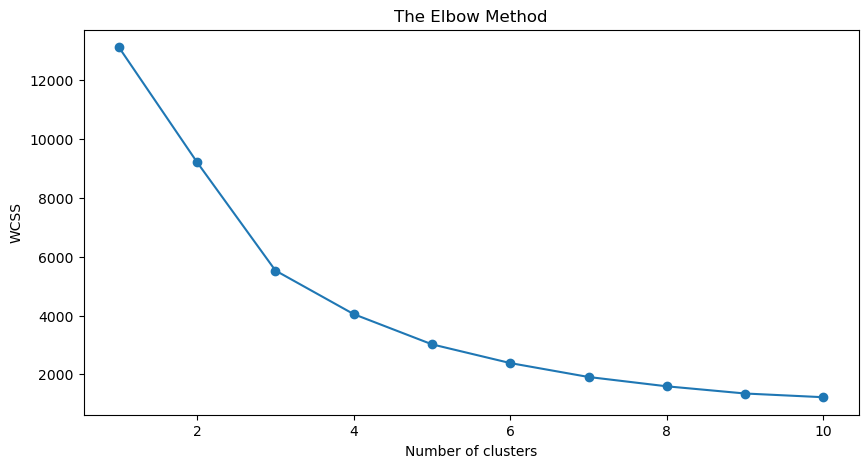

0    3241
1    1108
2      23
Name: Cluster, dtype: int64


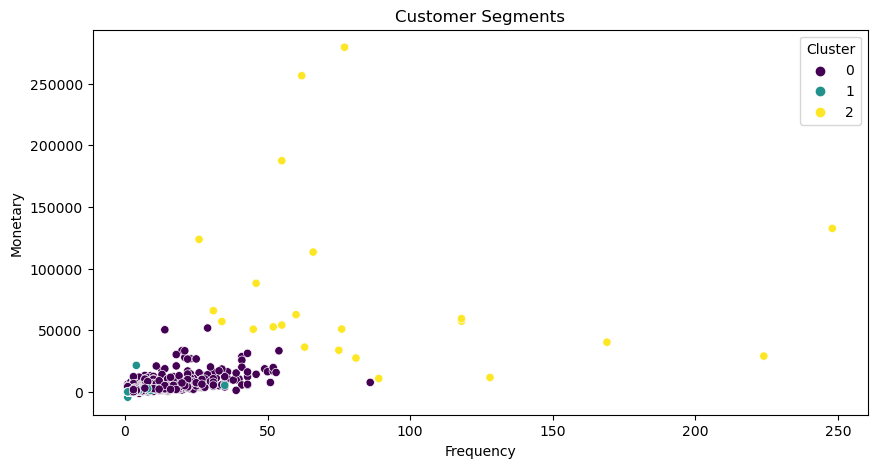

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Choosing the number of clusters (k) based on the elbow plot
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Checking the number of customers in each cluster
print(rfm['Cluster'].value_counts())

# Plotting the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments')
plt.show()


** Silhouette Score**

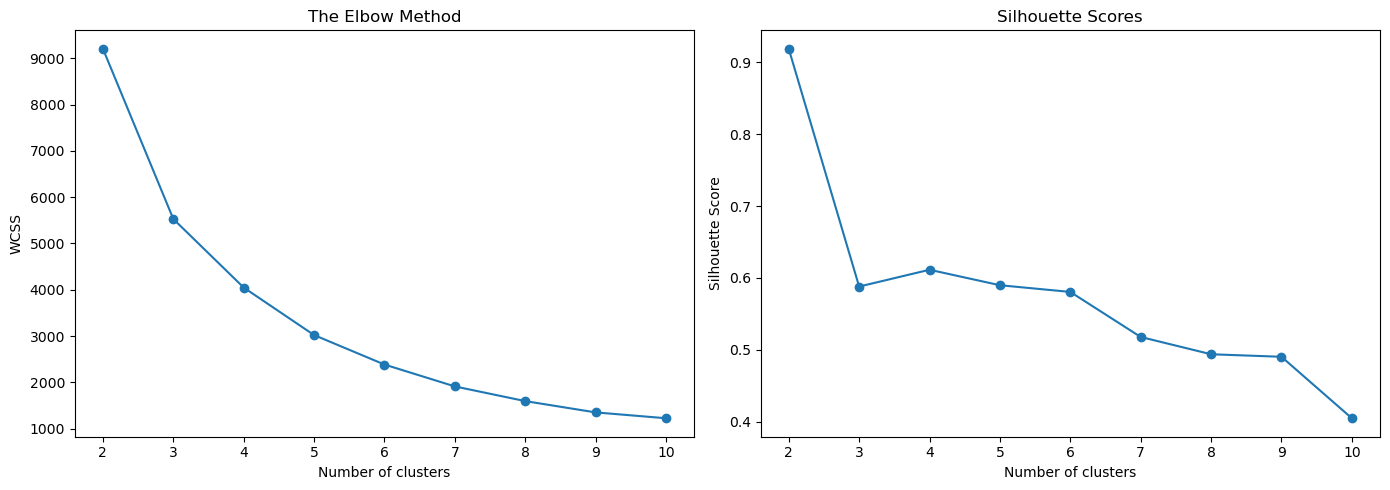

2    3169
0    1087
1     110
3       6
Name: Cluster, dtype: int64


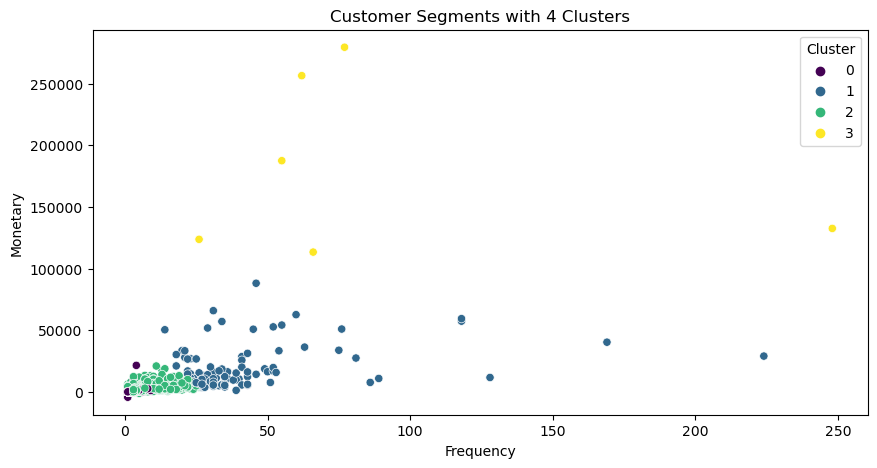

In [ ]:
from sklearn.metrics import silhouette_score

# Standardizing the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Calculating Silhouette Scores
wcss = []
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 as silhouette score cannot be calculated for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plotting WCSS (Elbow Method)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choosing the optimal number of clusters based on the plots
optimal_clusters = 4  # Replacing num of cluster based on the recent plot

# Applying K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Checking the number of customers in each cluster
print(rfm['Cluster'].value_counts())

# Plotting the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments with ' + str(optimal_clusters) + ' Clusters')
plt.show()


### 5. Segment Profiling:

   Cluster  Average Recency  Average Frequency  Average Monetary  Count
0        0       247.951242           1.805888        453.488888   1087
1        1         9.181818          40.672727      18441.961455    110
2        2        41.606500           4.802461       1478.515539   3169
3        3         7.666667          89.000000     182181.981667      6


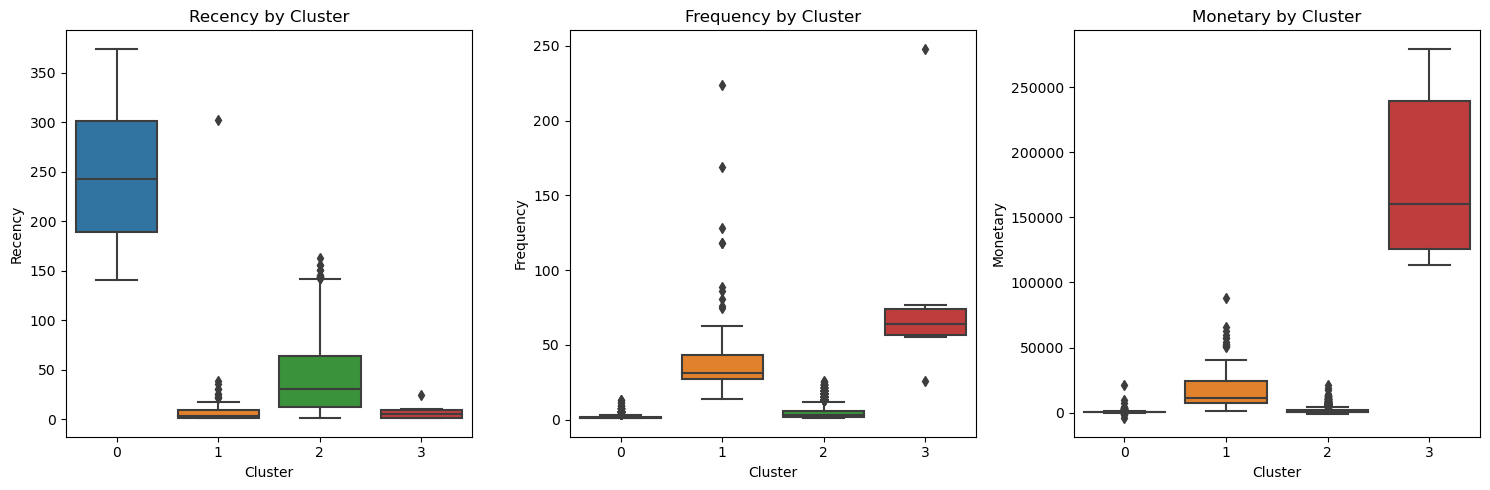

In [ ]:
# Analyzing each cluster

# Calculating the mean RFM values for each cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).reset_index()

# Renaming columns for better readability
cluster_profile.columns = ['Cluster', 'Average Recency', 'Average Frequency', 'Average Monetary', 'Count']

# Displaying the cluster profiles
print(cluster_profile)

# Box plots for further analysis
import matplotlib.pyplot as plt

# Recency
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary by Cluster')

plt.tight_layout()
plt.show()


Interpretation of Segment Profiles:
Average Recency: This metric shows how recent the purchases are on average within each cluster. A lower average recency indicates a cluster with more recent activity.

Average Frequency: This represents the average number of purchases in each cluster. Higher frequency indicates a cluster with more frequent purchases.

Average Monetary: This indicates the average spending of customers in each cluster. Higher values suggest clusters with higher spending customers.

Count: The number of customers in each cluster, indicating the size of each segment.

Box Plots: These provide visual insights into the distribution of RFM metrics within each cluster. They can show the range, median, and any potential outliers in each segment.

### 6. Marketing Recommendations:

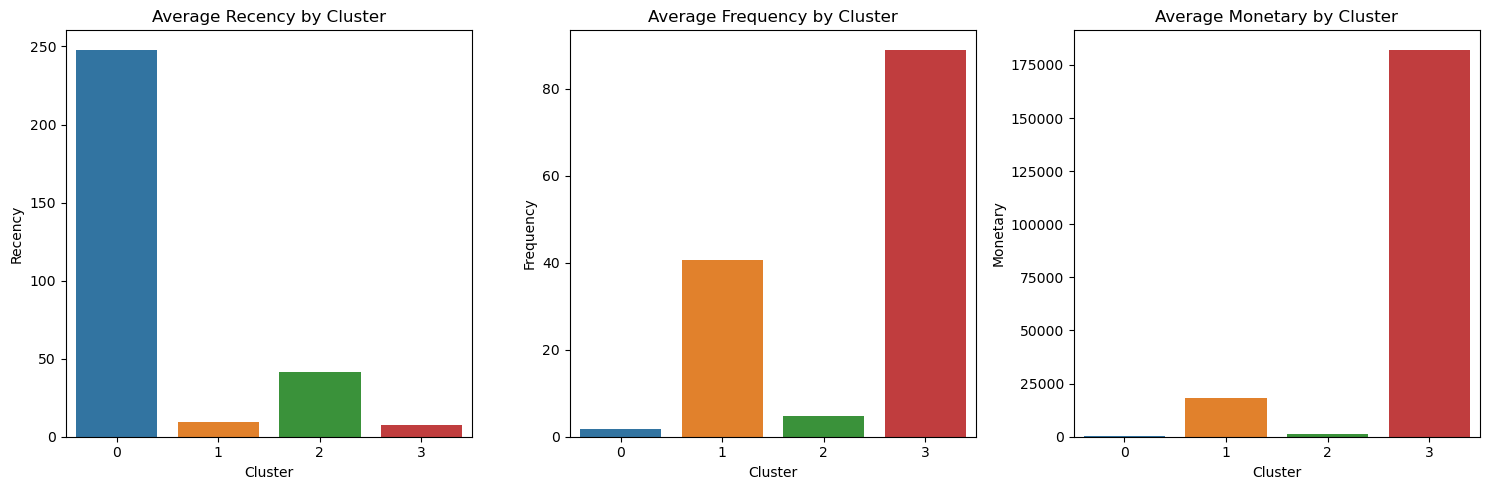

   Cluster     Recency  Frequency       Monetary  Count
0        0  247.951242   1.805888     453.488888   1087
1        1    9.181818  40.672727   18441.961455    110
2        2   41.606500   4.802461    1478.515539   3169
3        3    7.666667  89.000000  182181.981667      6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have an 'rfm' DataFrame with RFM scores and 'Cluster' column from K-Means clustering

# Grouping data by cluster to find average RFM values and count of customers in each cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Adding a count of customers in each cluster
cluster_analysis['Count'] = rfm.groupby('Cluster').size()

# Plotting average values for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Cluster', y='Recency', data=cluster_analysis, ax=axes[0])
axes[0].set_title('Average Recency by Cluster')

sns.barplot(x='Cluster', y='Frequency', data=cluster_analysis, ax=axes[1])
axes[1].set_title('Average Frequency by Cluster')

sns.barplot(x='Cluster', y='Monetary', data=cluster_analysis, ax=axes[2])
axes[2].set_title('Average Monetary by Cluster')

plt.tight_layout()
plt.show()

# Displaying the analysis
print(cluster_analysis)


In [ ]:
# Defining thresholds for each segment.
high_value_threshold = {'R': [0, 2], 'F': [3, 4], 'M': [3, 4]}
loyal_customer_threshold = {'R': [0, 3], 'F': [3, 4], 'M': [1, 4]}
potential_loyalist_threshold = {'R': [0, 3], 'F': [2, 3], 'M': [2, 4]}
new_customer_threshold = {'R': [0, 1], 'F': [1, 2], 'M': [1, 2]}
at_risk_threshold = {'R': [3, 4], 'F': [1, 3], 'M': [1, 3]}
churned_customer_threshold = {'R': [4, 4], 'F': [1, 2], 'M': [1, 2]}
# Converting the RFM quartile columns to integers for comparison
rfm['R_quartile'] = rfm['R_quartile'].astype(int)
rfm['F_quartile'] = rfm['F_quartile'].astype(int)
rfm['M_quartile'] = rfm['M_quartile'].astype(int)

# Categorizing customers based on defined thresholds
rfm['Segment'] = 'Other'  # Default segment
rfm.loc[
    (rfm['R_quartile'].between(*high_value_threshold['R'])) &
    (rfm['F_quartile'].between(*high_value_threshold['F'])) &
    (rfm['M_quartile'].between(*high_value_threshold['M'])), 'Segment'] = 'High-Value Customers'

rfm.loc[
    (rfm['R_quartile'].between(*loyal_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*loyal_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*loyal_customer_threshold['M'])), 'Segment'] = 'Loyal Customers'

rfm.loc[
    (rfm['R_quartile'].between(*potential_loyalist_threshold['R'])) &
    (rfm['F_quartile'].between(*potential_loyalist_threshold['F'])) &
    (rfm['M_quartile'].between(*potential_loyalist_threshold['M'])), 'Segment'] = 'Potential Loyalists'

rfm.loc[
    (rfm['R_quartile'].between(*new_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*new_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*new_customer_threshold['M'])), 'Segment'] = 'New Customers'

rfm.loc[
    (rfm['R_quartile'].between(*at_risk_threshold['R'])) &
    (rfm['F_quartile'].between(*at_risk_threshold['F'])) &
    (rfm['M_quartile'].between(*at_risk_threshold['M'])), 'Segment'] = 'At-Risk Customers'

rfm.loc[
    (rfm['R_quartile'].between(*churned_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*churned_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*churned_customer_threshold['M'])), 'Segment'] = 'Churned Customers'

# Displaying the segment distribution
print(rfm['Segment'].value_counts())

# Displaying the first few rows of the updated DataFrame
rfm.head()


Potential Loyalists    1080
Loyal Customers        1046
At-Risk Customers       985
Churned Customers       790
Other                   371
New Customers           100
Name: Segment, dtype: int64


,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,Cluster,Segment
CustomerID,,,,,,,,,
12346,326,2,0.00,1,3,4,134,0,Potential Loyalists
12347,2,7,4310.00,4,1,1,411,2,Churned Customers
12348,75,4,1797.24,2,2,1,221,2,Other
12349,19,1,1757.55,3,3,1,331,2,At-Risk Customers
12350,310,1,334.40,1,3,3,133,0,Potential Loyalists


Based on the typical profiles, here are some strategies for each segment:

1. High-Value Customers (Low Recency, High Frequency, High Monetary)
Loyalty Programs: Offer exclusive rewards or loyalty programs to enhance their buying experience.
Upsell and Cross-sell: Recommend premium products or complementary items as they are more likely to make frequent and high-value purchases.
Personalized Communication: Engage with personalized emails or messages that reflect their interests and past purchasing behavior.
Exclusive Offers: Provide early access to new products or exclusive deals to make them feel valued.
2. Loyal Customers (Moderate to Low Recency, High Frequency, Moderate Monetary)
Engagement Campaigns: Run regular engagement campaigns to maintain their interest and encourage continuous interaction with your brand.
Feedback and Reviews: Encourage them to provide feedback or reviews, enhancing their sense of belonging to the brand community.
Referral Incentives: Implement referral programs as loyal customers can be great brand ambassadors.
3. Potential Loyalists (Low Recency, Moderate Frequency, Moderate Monetary)
Welcome Offers: Acknowledge their recent interaction with welcome-back offers or discounts on their next purchase.
Product Recommendations: Use their past purchase history to recommend products, increasing the likelihood of repeat purchases.
Membership Programs: Introduce them to membership programs that offer incremental benefits with more purchases.
4. New Customers (Low Recency, Low Frequency, Low to Moderate Monetary)
First-Time Buyer Offers: Provide special offers or discounts on their next purchase to encourage them to come back.
Onboarding Series: Use an email onboarding series to educate them about different products and offers.
Social Proof: Share customer testimonials and reviews to build trust.
5. At-Risk Customers (High Recency, Moderate Frequency, Moderate Monetary)
Reactivation Campaigns: Send re-engagement emails or messages highlighting what they've missed.
Survey for Feedback: Understand their inactivity reasons through feedback surveys and address their concerns.
Win-Back Offers: Provide compelling offers or discounts to encourage them to make a purchase.
6. Churned Customers (High Recency, Low Frequency, Low Monetary)
Re-engagement Offers: Reach out with special offers to renew their interest.
Market Research: Conduct research to understand their needs and preferences better.
Improve Product/Service: Use insights from research to improve offerings and communicate these changes to them.


### 7. Visualization:

C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\147145768.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'])
C:\Users\gopan\AppData\Local\Temp\ipykernel_107212\147145768.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'])
C:\Users\gopan\AppData\Local\Temp\

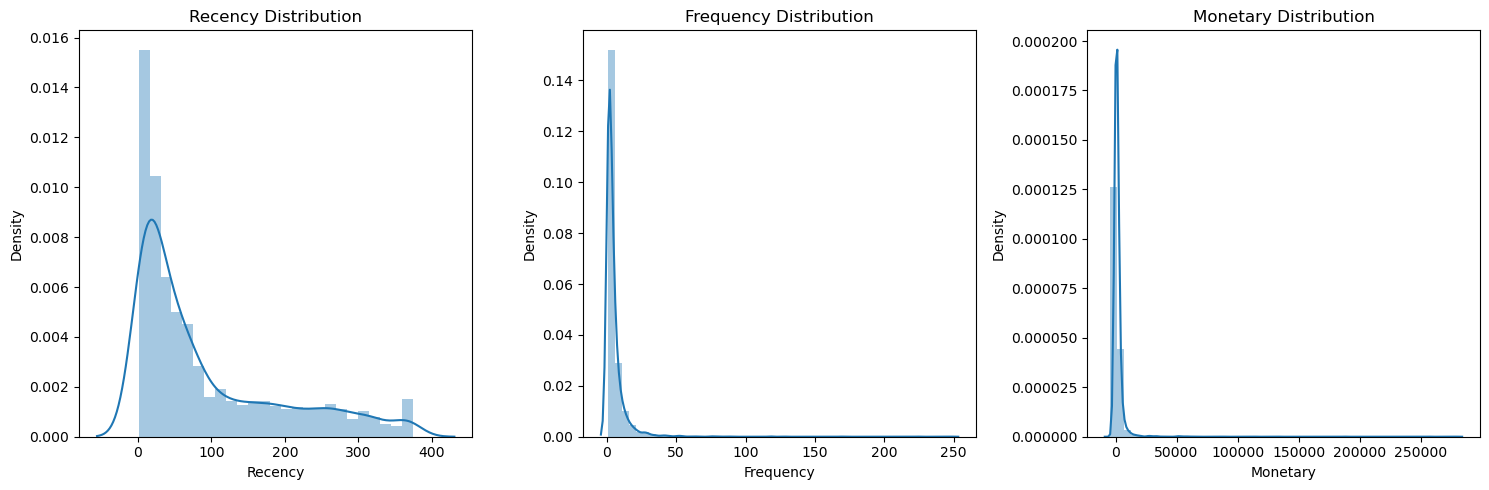

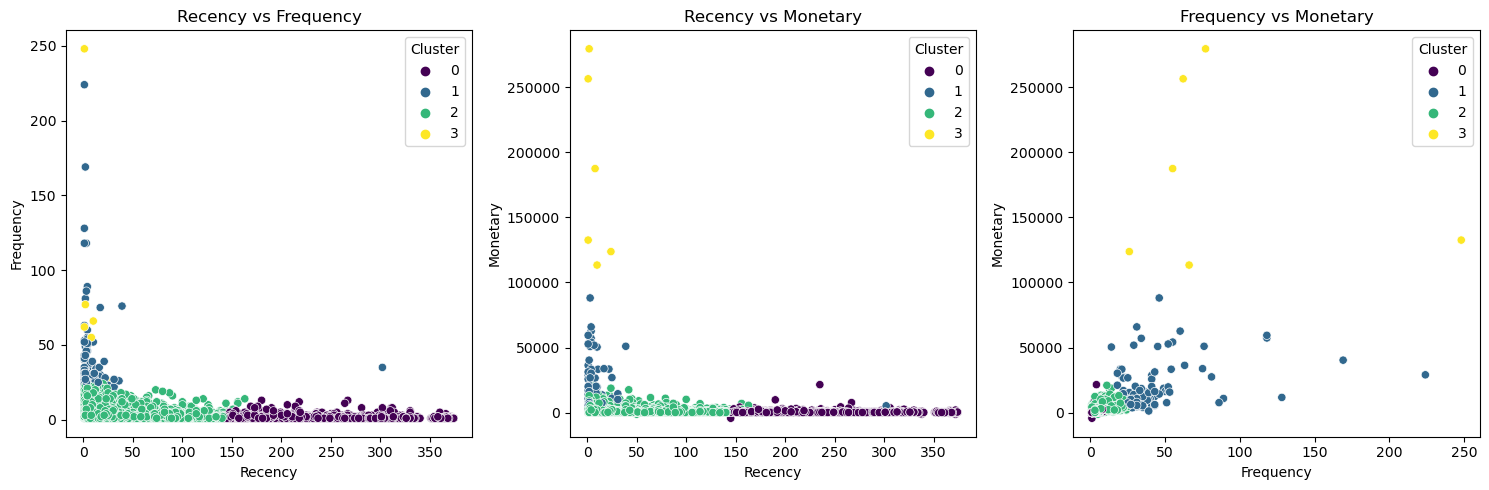

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rfm' is your DataFrame with RFM scores and 'Cluster' column

# 1. RFM Distribution Plots
plt.figure(figsize=(15, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.distplot(rfm['Recency'])
plt.title('Recency Distribution')

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.distplot(rfm['Frequency'])
plt.title('Frequency Distribution')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.distplot(rfm['Monetary'])
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# 2. RFM Cluster Scatter Plots
plt.figure(figsize=(15, 5))

# Scatter plot for Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis')
plt.title('Recency vs Frequency')

# Scatter plot for Recency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Recency vs Monetary')

# Scatter plot for Frequency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Frequency vs Monetary')

plt.tight_layout()
plt.show()




Explanation:
RFM Distribution Plots: These plots provide an overview of how Recency, Frequency, and Monetary values are distributed across your customer base.

RFM Cluster Scatter Plots: By plotting RFM metrics against each other and coloring points by cluster, you can visualize how the clusters are separated in the RFM space.


# * ANSWERS TO QUESTIONS *

# 1. Data Overview

In [ ]:
# Size of the dataset
dataset_size = data.shape

# Overview of each column
column_description = data.dtypes

# Checking for date or timestamp columns to identify the time period covered
date_columns = data.select_dtypes(include=['datetime', 'object']).columns  # Checking for datetime or object types
date_range = {}
for col in date_columns:
    try:
        data[col] = pd.to_datetime(data[col])  # Convert to datetime if possible
        date_range[col] = [data[col].min(), data[col].max()]
    except:
        continue  # Skip columns that cannot be converted to datetime

# Printing Dataset Size
print("Dataset Size:")
print("Rows:", dataset_size[0], "Columns:", dataset_size[1])

# Printing Column Descriptions
print("\nColumn Descriptions:")
for column, dtype in column_description.items():
    print(f"{column}: {dtype}")

# Printing Date Ranges
print("\nDate Ranges:")
for column, ranges in date_range.items():
    print(f"{column}: {ranges[0]} to {ranges[1]}")


Dataset Size:
Rows: 406829 Columns: 9

Column Descriptions:
InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDate: datetime64[ns]
UnitPrice: float64
CustomerID: int32
Country: object
TotalPrice: float64

Date Ranges:
InvoiceDate: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


C:\Users\gopan\AppData\Local\Temp\ipykernel_56468\2933504455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_datetime(data[col])  # Convert to datetime if possible


NOTE :
    1. The size of the dataset in terms of the number of rows and columns are 406829 Rows and 9 Columns.
    2.

# 2. Customer Analysis

In [ ]:
# Counting unique customers
unique_customers = data['CustomerID'].nunique()

# Number of orders per customer
orders_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Distribution summary
orders_distribution_summary = orders_per_customer.describe()

# Identifying the top 5 customers by order count
top_5_customers_by_orders = orders_per_customer.sort_values(ascending=False).head(5)

# Printing output:
print("Number of Unique Customers:", unique_customers)
print("\nDistribution of Orders Per Customer:\n", orders_distribution_summary)
print("\nTop 5 Customers by Order Count:\n", top_5_customers_by_orders)


Number of Unique Customers: 4372

Distribution of Orders Per Customer:
 count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

Top 5 Customers by Order Count:
 CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
Name: InvoiceNo, dtype: int64


# 3. Product Analysis

In [ ]:
# Identifying top 10 most frequently purchased products
top_10_products = data['Description'].value_counts().head(10)

# Determining the average price of products
average_price = data['UnitPrice'].mean()

# Calculating revenue for each product
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Since we don't have explicit product categories, we used 'Description' to approximate
# Summing revenue by product description
revenue_per_product = data.groupby('Description')['Revenue'].sum()

# Determinig the product generating the highest revenue
top_revenue_product = revenue_per_product.sort_values(ascending=False).head(1)

# To display the results, you can use:
print("Top 10 Most Frequently Purchased Products:\n", top_10_products)
print("\nAverage Price of Products: {:.2f}".format(average_price))
print("\nProduct Generating the Highest Revenue:\n", top_revenue_product)


Top 10 Most Frequently Purchased Products:
 WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

Average Price of Products: 4.61

Product Generating the Highest Revenue:
 Description
DOTCOM POSTAGE    206245.48
Name: Revenue, dtype: float64


# 4. Time Analysis

In [ ]:
# Assuming 'data' is your DataFrame and 'InvoiceDate' is the column with date and time information
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extracting day of week and hour for order placement analysis
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['HourOfDay'] = data['InvoiceDate'].dt.hour

# Analyzing orders by day of week
orders_by_day = data['DayOfWeek'].value_counts()

# Analyzing orders by time of day
orders_by_hour = data['HourOfDay'].value_counts()

# Calculating average order processing time
data_sorted = data.sort_values(['CustomerID', 'InvoiceDate'])
data_sorted['PreviousInvoiceDate'] = data_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
data_sorted['ProcessingTime'] = (data_sorted['InvoiceDate'] - data_sorted['PreviousInvoiceDate']).dt.total_seconds() / 3600
average_processing_time = data_sorted['ProcessingTime'].mean()

# For seasonal trends, extracting month and year
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
orders_by_month = data.groupby(['Year', 'Month']).size()

# Displaying the results
print("Orders by Day of Week:\n", orders_by_day)
print("\nOrders by Hour of Day:\n", orders_by_hour)

# Displaying the average processing time
print(f"\nAverage Order Processing Time: {average_processing_time:.2f} hours")

print("\nOrders by Month:\n", orders_by_month)


Orders by Day of Week:
 Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: DayOfWeek, dtype: int64

Orders by Hour of Day:
 12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: HourOfDay, dtype: int64

Average Order Processing Time: 34.86 hours

Orders by Month:
 Year  Month
2010  12       42481
2011  1        35147
      2        27707
      3        36748
      4        29916
      5        37030
      6        36874
      7        39518
      8        35284
      9        50226
      10       60742
      11       84711
      12       25525
dtype: int64


# 5. Geographical Analysis

In [ ]:
# Identifying the top 5 countries with the highest number of orders
top_5_countries_orders = data['Country'].value_counts().head(5)

# Calculating the average order value for each country
# Calculating total revenue for each order
data['OrderValue'] = data['Quantity'] * data['UnitPrice']

# Summing up order values per country
total_order_value_per_country = data.groupby('Country')['OrderValue'].sum()
# Counting number of orders per country
number_of_orders_per_country = data.groupby('Country')['InvoiceNo'].nunique()
# Calculating average order value
average_order_value_per_country = total_order_value_per_country / number_of_orders_per_country

# Displaying the results
print("Top 5 Countries with the Highest Number of Orders:\n", top_5_countries_orders)
print("\nAverage Order Value by Country:\n", average_order_value_per_country.sort_values(ascending=False))


Top 5 Countries with the Highest Number of Orders:
 United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

Average Order Value by Country:
 Country
Netherlands             2818.431089
Australia               1986.627101
Lebanon                 1693.880000
Japan                   1262.165000
Israel                  1165.708333
Brazil                  1143.600000
RSA                     1002.310000
Singapore                912.039000
Denmark                  893.720952
Norway                   879.086500
Sweden                   795.563261
Greece                   785.086667
Switzerland              785.061972
EIRE                     784.593166
Cyprus                   647.314500
United Arab Emirates     634.093333
Iceland                  615.714286
Canada                   611.063333
Channel Islands          608.675455
Austria                  534.437895
Spain                    521.6626

C:\Users\gopan\AppData\Local\Temp\ipykernel_56468\42798071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OrderValue'] = data['Quantity'] * data['UnitPrice']


NOTE : Is there a correlation between the country of the customer and the average order
value?
   > Certain countries, like the Netherlands, Australia, and Lebanon, have higher average order values compared to others.
There is a wide range of average order values, from over 2800 in the Netherlands to under 250 in the Czech Republic.
The United Kingdom, which may be where the majority of customers are based (assuming from a common e-commerce dataset pattern), has a relatively lower average order value compared to the top countries listed.

# 6.Payment Analysis

NOTE : THERE IS NO DATASET FOR PAYMENT METHOD , THIS WOULD BE THE NECESSARY STEPS IF THE PAYMENT METHOD WAS AVAILABLE IN THE DATASET.

In [ ]:
# common payment methods
payment_method_counts = data['PaymentMethod'].value_counts()

# To assess the relationship between payment method and order amount
average_order_amount_by_payment = data.groupby('PaymentMethod')['TotalOrderValue'].mean()


# 7.Customer Behavior

In [ ]:
# Calculating the first and last purchase date for each customer
first_purchase = data.groupby('CustomerID')['InvoiceDate'].min()
last_purchase = data.groupby('CustomerID')['InvoiceDate'].max()

# Calculating the duration of activity for each customer
customer_activity_duration = last_purchase - first_purchase

# Calculating the average activity duration
average_activity_duration = customer_activity_duration.mean()

print("Average Customer Activity Duration:", average_activity_duration)

Average Customer Activity Duration: 133 days 17:25:29.204025618


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DayOfWeek,HourOfDay,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010


In [ ]:
# Creating a order value column
data['OrderValue']= data['Quantity']*data['UnitPrice']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DayOfWeek,HourOfDay,Month,Year,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,12,2010,20.34


In [ ]:
# Performing RFM analysis
# Assuming 'today' is the day after the latest date in the dataset
latest_date = data['InvoiceDate'].max()
today = latest_date + pd.Timedelta(days=1)

# Recency: Days since last purchase
recency = today - data.groupby('CustomerID')['InvoiceDate'].max()
recency = recency.dt.days

# Frequency: Total number of orders for each customer
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# As OrderValue column is already calculated as Quantity * UnitPrice
# Monetary: Sum of total price for each customer
monetary = data.groupby('CustomerID')['OrderValue'].sum()

# Creating the RFM DataFrame
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [ ]:
# Defining the thresholds for each segment.
high_value_threshold = {'R': [0, 2], 'F': [3, 4], 'M': [3, 4]}
loyal_customer_threshold = {'R': [0, 3], 'F': [3, 4], 'M': [1, 4]}
potential_loyalist_threshold = {'R': [0, 3], 'F': [2, 3], 'M': [2, 4]}
new_customer_threshold = {'R': [0, 1], 'F': [1, 2], 'M': [1, 2]}
at_risk_threshold = {'R': [3, 4], 'F': [1, 3], 'M': [1, 3]}
churned_customer_threshold = {'R': [4, 4], 'F': [1, 2], 'M': [1, 2]}
# Converting the RFM quartile columns to integers for comparison
rfm['R_quartile'] = rfm['R_quartile'].astype(int)
rfm['F_quartile'] = rfm['F_quartile'].astype(int)
rfm['M_quartile'] = rfm['M_quartile'].astype(int)

# Categorizing customers based on defined thresholds
rfm['Segment'] = 'Other'  # Default segment
rfm.loc[
    (rfm['R_quartile'].between(*high_value_threshold['R'])) &
    (rfm['F_quartile'].between(*high_value_threshold['F'])) &
    (rfm['M_quartile'].between(*high_value_threshold['M'])), 'Segment'] = 'High-Value Customers'

rfm.loc[
    (rfm['R_quartile'].between(*loyal_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*loyal_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*loyal_customer_threshold['M'])), 'Segment'] = 'Loyal Customers'

rfm.loc[
    (rfm['R_quartile'].between(*potential_loyalist_threshold['R'])) &
    (rfm['F_quartile'].between(*potential_loyalist_threshold['F'])) &
    (rfm['M_quartile'].between(*potential_loyalist_threshold['M'])), 'Segment'] = 'Potential Loyalists'

rfm.loc[
    (rfm['R_quartile'].between(*new_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*new_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*new_customer_threshold['M'])), 'Segment'] = 'New Customers'

rfm.loc[
    (rfm['R_quartile'].between(*at_risk_threshold['R'])) &
    (rfm['F_quartile'].between(*at_risk_threshold['F'])) &
    (rfm['M_quartile'].between(*at_risk_threshold['M'])), 'Segment'] = 'At-Risk Customers'

rfm.loc[
    (rfm['R_quartile'].between(*churned_customer_threshold['R'])) &
    (rfm['F_quartile'].between(*churned_customer_threshold['F'])) &
    (rfm['M_quartile'].between(*churned_customer_threshold['M'])), 'Segment'] = 'Churned Customers'

# Displaying the segment distribution
print(rfm['Segment'].value_counts())

# Optionally, display the first few rows of the updated DataFrame
rfm.head()


Potential Loyalists    1080
Loyal Customers        1046
At-Risk Customers       985
Churned Customers       790
Other                   371
New Customers           100
Name: Segment, dtype: int64


,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,Cluster,Segment
CustomerID,,,,,,,,,
12346,326,2,0.00,1,3,4,134,0,Potential Loyalists
12347,2,7,4310.00,4,1,1,411,2,Churned Customers
12348,75,4,1797.24,2,2,1,221,2,Other
12349,19,1,1757.55,3,3,1,331,2,At-Risk Customers
12350,310,1,334.40,1,3,3,133,0,Potential Loyalists


 # Q. Are there any customer segments based on their purchase behavior
    > YES, customer segments are based on their purchase behavior and the table above shows the segment.

# 8. Returns and Refunds *

Note  : Returns cant be found as it is not available in the dataset.
 >If the dataset was available we would consider -ve values in 'Quantity' column indicating refund and 'ProductCategory' column will be used to calculate the percentage of return by category.

In [ ]:
# If there was a 'Quantity' column then negative values would indicate returns
# Calculating the total number of orders and the number of returned orders
total_orders = data['InvoiceNo'].nunique()
returned_orders = data[data['Quantity'] < 0]['InvoiceNo'].nunique()
percentage_returns = (returned_orders / total_orders) * 100

# If there was a 'ProductCategory' column then
# Calculating the percentage of returns by product category
returns_by_category = data[data['Quantity'] < 0].groupby('ProductCategory')['InvoiceNo'].nunique()
orders_by_category = data.groupby('ProductCategory')['InvoiceNo'].nunique()
percentage_returns_by_category = (returns_by_category / orders_by_category) * 100

# 9. Profitability Analysis

NOTE  : To perform a profitability analysis using your dataset, we need both revenue and the cost associated with each sale to calculate profit.
 > Profit=Total Sales Revenue−Total Cost of Goods

In [ ]:
# TOTAL PROFIT CALCULATION
# If the dataset had 'ProfitMargin' columns then,
# Total Sales Revenue = UnitPrice * Quantity
data['SalesRevenue'] = data['UnitPrice'] * data['Quantity']

# If COGS data is not available but Profit Margin percentage was available then,
# COGS = SalesRevenue - (SalesRevenue * ProfitMargin)
data['COGS'] = data['SalesRevenue'] - (data['SalesRevenue'] * data['ProfitMargin'])

# Calculating Total Profit = Total Sales Revenue - Total COGS
total_profit = data['SalesRevenue'].sum() - data['COGS'].sum()


In [ ]:
# TOP 5 PRODUCTS WITH HIGHEST PROFIT MARGIN
# Calculating Profit Margin for each product
# Calculating Profit Margin = (SalesRevenue - COGS) / SalesRevenue
data['ProductProfitMargin'] = (data['SalesRevenue'] - data['COGS']) / data['SalesRevenue']

# Grouping by Product and calculate average profit margin
average_profit_margin_by_product = data.groupby('Product')['ProductProfitMargin'].mean()

# Finding top 5 products with the highest profit margins
top_5_products_profit_margin = average_profit_margin_by_product.sort_values(ascending=False).head(5)

# 10. Customer Satisfaction

NOTE : The dataset does not have a CustomerFeedback column , if the CustomerFeedback column was available then the necessary steps that we would have performed are shown below. If the customer feedback is in the form of text (reviews or comments), we will use Natural Language Processing (NLP) techniques to perform sentiment analysis. Python libraries like TextBlob can be used.

In [ ]:
from textblob import TextBlob

# Assuming 'data' has a 'CustomerFeedback' column
# Apply TextBlob to each feedback to get sentiment polarity
data['SentimentPolarity'] = data['CustomerFeedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiments as Positive, Neutral, or Negative
data['Sentiment'] = pd.cut(data['SentimentPolarity'], bins=3, labels=["Negative", "Neutral", "Positive"])

# Analyze sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()

sentiment_distribution


NOTE : For Analysis of Feedback Trends there is no rating column available in the dataset.
    
If the dataset include numerical ratings like a 5-star , we would analyze trends such as the average rating per product, changes in ratings over time, or the distribution of ratings.

In [ ]:
# If 'data' has a 'Rating' column then,
# Calculate the average rating for each product
average_rating_by_product = data.groupby('Product')['Rating'].mean()

# Analyzing rating distribution
rating_distribution = data['Rating'].value_counts()

average_rating_by_product, rating_distribution
